# Spark DataFrame - Data plot using matplot


In [2]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import warnings
warnings.simplefilter(action='ignore')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('visualize').getOrCreate()

In [3]:
# Let's read in the data. Note that it's in the csv

#City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
#define the schema

# Let's import in the relevant types.
warnings.filterwarnings('ignore')
from pyspark.sql.types import *
Schema=StructType([
  StructField("City",StringType(),nullable=True),
  StructField("Date",StringType(),nullable=True),
  StructField("PM25",FloatType(),nullable=True),
  StructField("PM10",FloatType(),nullable=True),
  StructField("NO",FloatType(),nullable=True),
  StructField("NO2",FloatType(),nullable=True),
  StructField("NOX",FloatType(),nullable=True),
  StructField("NH3",FloatType(),nullable=True),
  StructField("CO",FloatType(),nullable=True),
  StructField("SO2",FloatType(),nullable=True),
  StructField("O3",FloatType(),nullable=True),
  StructField("benzene",FloatType(),nullable=True),
  StructField("toluene",FloatType(),nullable=True),
  StructField("Xylene",FloatType(),nullable=True),
  StructField("AQI",FloatType(),nullable=True),
  StructField("AQIBucket",StringType(),nullable=True)
])
df = spark.read.option("header",True).schema(Schema).csv("Datasets/city_day.csv")

df.show()

+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|     City|      Date|PM25|PM10|    NO|  NO2|   NOX| NH3|    CO|  SO2|    O3|benzene|toluene|Xylene| AQI|AQIBucket|
+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|Ahmedabad|2015-01-01|null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|null|     null|
|Ahmedabad|2015-01-02|null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|null|     null|
|Ahmedabad|2015-01-03|null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|null|     null|
|Ahmedabad|2015-01-04|null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|null|     null|
|Ahmedabad|2015-01-05|null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|null|     null|
|Ahmedabad|2015-01-06|null|null| 45.41|38.48|  81.5|null| 45.41|45.76| 4

In [4]:
# The show method allows you visualise DataFrames. We can see that there are two columns. 
df.show()

# You could also try this. 
df.columns

df.dtypes

df.describe().toPandas()

+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|     City|      Date|PM25|PM10|    NO|  NO2|   NOX| NH3|    CO|  SO2|    O3|benzene|toluene|Xylene| AQI|AQIBucket|
+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+
|Ahmedabad|2015-01-01|null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|null|     null|
|Ahmedabad|2015-01-02|null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|null|     null|
|Ahmedabad|2015-01-03|null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|null|     null|
|Ahmedabad|2015-01-04|null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|null|     null|
|Ahmedabad|2015-01-05|null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|null|     null|
|Ahmedabad|2015-01-06|null|null| 45.41|38.48|  81.5|null| 45.41|45.76| 4

,summary,City,Date,PM25,PM10,NO,NO2,NOX,NH3,CO,SO2,O3,benzene,toluene,Xylene,AQI,AQIBucket
0,count,29531,29531,24933,18391,25949,25946,25346,19203,27472,25677,25509,23908,21490,11422,24850,24850
1,mean,None,None,67.45057795305125,118.12710294174458,17.574729666828148,28.560659052670943,32.3091233306691,23.483476022437166,2.248598209145695,14.531977259530647,34.49143047007627,3.280840303665094,8.700972087396305,3.0701278206492613,166.4635814889336,None
2,stddev,None,None,64.66144940408857,90.60510976469615,22.785846340154315,24.474745771469095,31.646010951236956,25.68427498752751,6.962884271836143,18.13377486834342,21.694928182946093,15.811136401685069,19.969163666257156,6.323247403424576,140.69658509414992,None
3,min,Ahmedabad,2015-01-01,0.04,0.01,0.02,0.01,0.0,0.01,0.0,0.01,0.01,0.0,0.0,0.0,13.0,Good
4,max,Visakhapatnam,2020-07-01,949.99,1000.0,390.68,362.21,467.63,352.89,175.81,193.86,257.73,455.03,454.85,170.37,2049.0,Very Poor


In [5]:
pd1=df.toPandas()

In [6]:
print(pd1)

                City        Date       PM25       PM10     NO        NO2  \
0          Ahmedabad  2015-01-01        NaN        NaN   0.92  18.219999   
1          Ahmedabad  2015-01-02        NaN        NaN   0.97  15.690000   
2          Ahmedabad  2015-01-03        NaN        NaN  17.40  19.299999   
3          Ahmedabad  2015-01-04        NaN        NaN   1.70  18.480000   
4          Ahmedabad  2015-01-05        NaN        NaN  22.10  21.420000   
...              ...         ...        ...        ...    ...        ...   
29526  Visakhapatnam  2020-06-27  15.020000  50.939999   7.68  25.059999   
29527  Visakhapatnam  2020-06-28  24.379999  74.089996   3.42  26.059999   
29528  Visakhapatnam  2020-06-29  22.910000  65.730003   3.45  29.530001   
29529  Visakhapatnam  2020-06-30  16.639999  49.970001   4.05  29.260000   
29530  Visakhapatnam  2020-07-01  15.000000  66.000000   0.40  26.850000   

             NOX    NH3     CO        SO2          O3  benzene    toluene  \
0      17.

In [7]:
pd1.head()

,City,Date,PM25,PM10,NO,NO2,NOX,NH3,CO,SO2,O3,benzene,toluene,Xylene,AQI,AQIBucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.219999,17.150000,NaN,0.92,27.639999,133.360001,0.00,0.020000,0.00,NaN,None
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.690000,16.459999,NaN,0.97,24.549999,34.060001,3.68,5.500000,3.77,NaN,None
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.299999,29.700001,NaN,17.40,29.070000,30.700001,6.80,16.400000,2.25,NaN,None
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.480000,17.969999,NaN,1.70,18.590000,36.080002,4.43,10.140000,1.00,NaN,None
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.420000,37.759998,NaN,22.10,39.330002,39.310001,7.01,18.889999,2.78,NaN,None


In [8]:
import pandas as pd
pd1['Date']=pd.to_datetime(pd1['Date'])
pd1.head()

,City,Date,PM25,PM10,NO,NO2,NOX,NH3,CO,SO2,O3,benzene,toluene,Xylene,AQI,AQIBucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.219999,17.150000,NaN,0.92,27.639999,133.360001,0.00,0.020000,0.00,NaN,None
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.690000,16.459999,NaN,0.97,24.549999,34.060001,3.68,5.500000,3.77,NaN,None
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.299999,29.700001,NaN,17.40,29.070000,30.700001,6.80,16.400000,2.25,NaN,None
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.480000,17.969999,NaN,1.70,18.590000,36.080002,4.43,10.140000,1.00,NaN,None
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.420000,37.759998,NaN,22.10,39.330002,39.310001,7.01,18.889999,2.78,NaN,None


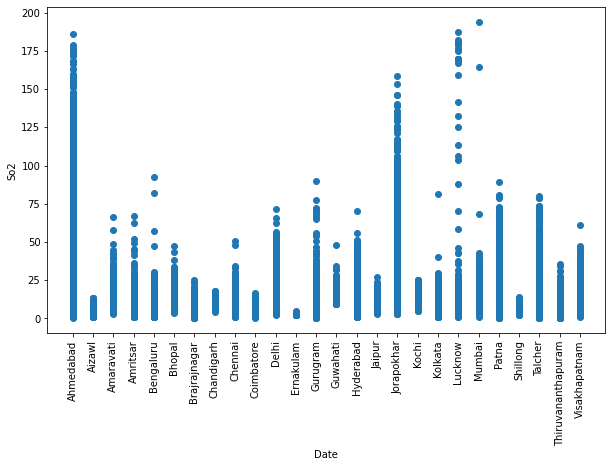

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
#ax1= fig.add_axes(0,0,1,1)
#ax2=fig.add_axes([0.05,0.65,0.5,0.3])
#ax1.set_title('x vs Y')
#ax1.plt(pd1['Date'], by=pd1['City'],color='green')
#ax2.plt(pd1['Date'], pd1['SO2'],color='blue')
#plt.plot(pd1['Date'], pd1['City'],color='green')

plt.scatter(pd1['City'],pd1['SO2'])

plt.xlabel('Date')
plt.ylabel('So2')
plt.xticks(rotation=90)
plt.show()


In [10]:
pd1['year']=pd.DatetimeIndex(pd1['Date']).year

In [11]:
pd1.head()

,City,Date,PM25,PM10,NO,NO2,NOX,NH3,CO,SO2,O3,benzene,toluene,Xylene,AQI,AQIBucket,year
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.219999,17.150000,NaN,0.92,27.639999,133.360001,0.00,0.020000,0.00,NaN,None,2015
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.690000,16.459999,NaN,0.97,24.549999,34.060001,3.68,5.500000,3.77,NaN,None,2015
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.299999,29.700001,NaN,17.40,29.070000,30.700001,6.80,16.400000,2.25,NaN,None,2015
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.480000,17.969999,NaN,1.70,18.590000,36.080002,4.43,10.140000,1.00,NaN,None,2015
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.420000,37.759998,NaN,22.10,39.330002,39.310001,7.01,18.889999,2.78,NaN,None,2015


array([[<AxesSubplot:title={'center':'2015'}>,
        <AxesSubplot:title={'center':'2016'}>],
       [<AxesSubplot:title={'center':'2017'}>,
        <AxesSubplot:title={'center':'2018'}>],
       [<AxesSubplot:title={'center':'2019'}>,
        <AxesSubplot:title={'center':'2020'}>]], dtype=object)

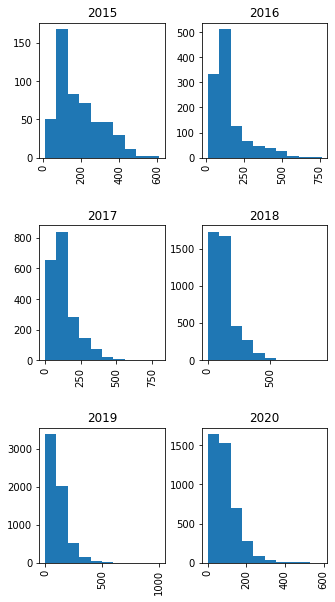

In [20]:
pd1.hist(column='PM10',figsize=(5,10), by='year')



array([[<AxesSubplot:title={'center':'Ahmedabad'}>,
        <AxesSubplot:title={'center':'Aizawl'}>,
        <AxesSubplot:title={'center':'Amaravati'}>,
        <AxesSubplot:title={'center':'Amritsar'}>,
        <AxesSubplot:title={'center':'Bengaluru'}>],
       [<AxesSubplot:title={'center':'Bhopal'}>,
        <AxesSubplot:title={'center':'Brajrajnagar'}>,
        <AxesSubplot:title={'center':'Chandigarh'}>,
        <AxesSubplot:title={'center':'Chennai'}>,
        <AxesSubplot:title={'center':'Coimbatore'}>],
       [<AxesSubplot:title={'center':'Delhi'}>,
        <AxesSubplot:title={'center':'Ernakulam'}>,
        <AxesSubplot:title={'center':'Gurugram'}>,
        <AxesSubplot:title={'center':'Guwahati'}>,
        <AxesSubplot:title={'center':'Hyderabad'}>],
       [<AxesSubplot:title={'center':'Jaipur'}>,
        <AxesSubplot:title={'center':'Jorapokhar'}>,
        <AxesSubplot:title={'center':'Kochi'}>,
        <AxesSubplot:title={'center':'Kolkata'}>,
        <AxesSubplot:title=

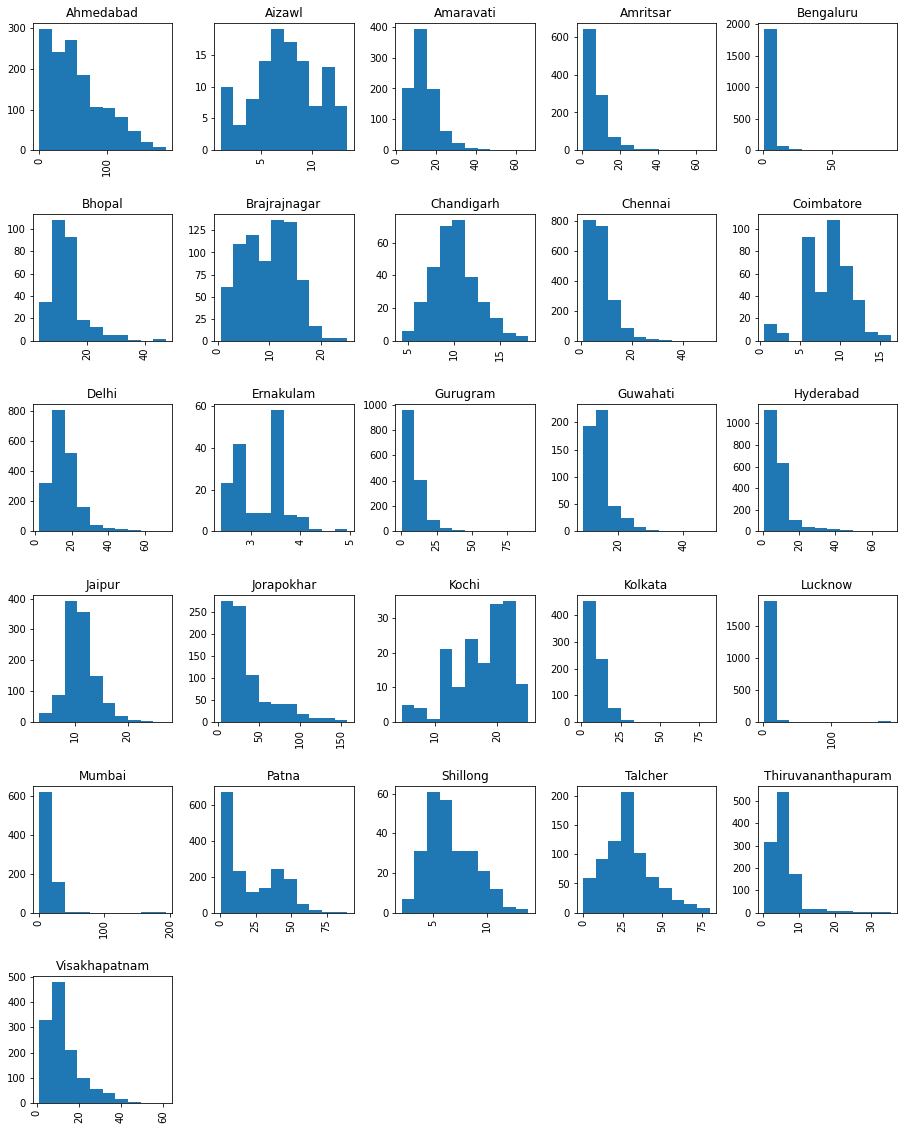

In [13]:
pd1.hist(column='SO2',figsize=(15,20), by='City')

Text(0, 0.5, 'SO2')

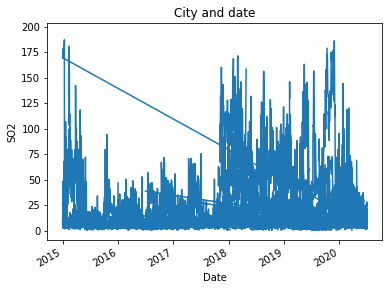

In [14]:
plt.plot(pd1.Date,pd1.SO2)
plt.title('City and date')
plt.xticks(rotation=30,ha='right')
plt.xlabel('Date')
plt.ylabel('SO2')


In [15]:
# Let's pick a row, collect it.  
# To Get Year from date or Time column

### Get Year from date in pyspark
 
from pyspark.sql.functions import year
from pyspark.sql.functions import to_date

df1= df.withColumn("year",year("Date"))

df1.show()

+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+----+
|     City|      Date|PM25|PM10|    NO|  NO2|   NOX| NH3|    CO|  SO2|    O3|benzene|toluene|Xylene| AQI|AQIBucket|year|
+---------+----------+----+----+------+-----+------+----+------+-----+------+-------+-------+------+----+---------+----+
|Ahmedabad|2015-01-01|null|null|  0.92|18.22| 17.15|null|  0.92|27.64|133.36|    0.0|   0.02|   0.0|null|     null|2015|
|Ahmedabad|2015-01-02|null|null|  0.97|15.69| 16.46|null|  0.97|24.55| 34.06|   3.68|    5.5|  3.77|null|     null|2015|
|Ahmedabad|2015-01-03|null|null|  17.4| 19.3|  29.7|null|  17.4|29.07|  30.7|    6.8|   16.4|  2.25|null|     null|2015|
|Ahmedabad|2015-01-04|null|null|   1.7|18.48| 17.97|null|   1.7|18.59| 36.08|   4.43|  10.14|   1.0|null|     null|2015|
|Ahmedabad|2015-01-05|null|null|  22.1|21.42| 37.76|null|  22.1|39.33| 39.31|   7.01|  18.89|  2.78|null|     null|2015|
|Ahmedabad|2015-01-06|null|null|

In [16]:
df2=df1.filter((df1['City'] == 'Ahmedabad') & ( df1['year']==2015) & (df1['AQI']>0)).show()


+---------+----------+------+----+-----+-----+-----+----+-----+-----+------+-------+-------+------+-----+---------+----+
|     City|      Date|  PM25|PM10|   NO|  NO2|  NOX| NH3|   CO|  SO2|    O3|benzene|toluene|Xylene|  AQI|AQIBucket|year|
+---------+----------+------+----+-----+-----+-----+----+-----+-----+------+-------+-------+------+-----+---------+----+
|Ahmedabad|2015-01-29| 83.13|null| 6.93|28.71|33.72|null| 6.93|49.52| 59.76|   0.02|    0.0|  3.14|209.0|     Poor|2015|
|Ahmedabad|2015-01-30| 79.84|null|13.85|28.68|41.08|null|13.85|48.49| 97.07|   0.04|    0.0|  4.81|328.0|Very Poor|2015|
|Ahmedabad|2015-01-31| 94.52|null|24.39|32.66|52.61|null|24.39|67.39|111.33|   0.24|   0.01|  7.67|514.0|   Severe|2015|
|Ahmedabad|2015-02-01|135.99|null|43.48|42.08|84.57|null|43.48|75.23| 102.7|    0.4|   0.04| 25.87|782.0|   Severe|2015|
|Ahmedabad|2015-02-02|178.33|null|54.56|35.31| 72.8|null|54.56|55.04|107.38|   0.46|   0.06| 35.61|914.0|   Severe|2015|
|Ahmedabad|2015-02-03| 139.7|nul

In [17]:
df2